## 구글드라이브 연동

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 라이브러리 불러오기

In [ ]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import seaborn as sns
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
pip install --upgrade pandas

In [ ]:
import pandas as pd

print(pd.__version__)

2.1.0


## 한글폰트 적용

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

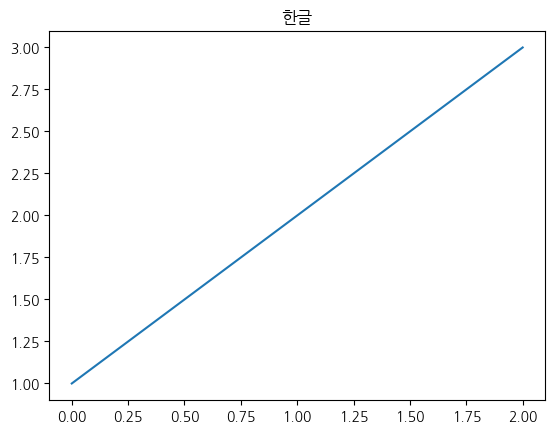

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic' # 나눔바른고딕 적용하기
plt.plot([1, 2, 3])
plt.title("한글")
plt.show()

### 파일 불러오기

In [ ]:
def process_subway_data(line_number):
    # 파일 경로 생성
    file_path = f'/content/drive/MyDrive/세미 프로젝트/data/은채님{line_number}호선.csv'

    # 데이터 불러오기
    data = pd.read_csv(file_path)

    # 2022년 데이터 필터링
    data_2022 = data[data['YEAR'] == 2022]

    # 요일별 상선, 하선 평균 혼잡도 계산
    avg_congestion_by_day = data_2022.groupby(['DAY', 'DIRECTION'])[['TIME_05', 'TIME_06', 'TIME_07', 'TIME_08', 'TIME_09', 'TIME_10', 'TIME_11', 'TIME_12', 'TIME_13', 'TIME_14', 'TIME_15', 'TIME_16', 'TIME_17', 'TIME_18', 'TIME_19', 'TIME_20', 'TIME_21', 'TIME_22', 'TIME_23', 'TIME_00']].mean()

    # 웹에서 사용할 데이터 구조 생성
    days_of_week = ['월', '화', '수', '목', '금', '토', '일']
    data_for_web = []

    for day in days_of_week:
        avg_congestion_day = avg_congestion_by_day.loc[day]

        data_entry_up = {
            'name': day,
            'direction': '상선',
            'y_avg': avg_congestion_day.loc['상선'].mean()
        }
        data_entry_down = {
            'name': day,
            'direction': '하선',
            'y_avg': avg_congestion_day.loc['하선'].mean()
        }

        data_for_web.append(data_entry_up)
        data_for_web.append(data_entry_down)

    return data_for_web

In [ ]:
# 1호선부터 8호선까지의 데이터 처리
for i in range(1, 9):
    data_for_web = process_subway_data(i)

    # 결과 출력
    print(f'Line {i} 데이터:')
    for entry in data_for_web:
        print(entry)
    print('\n')

Line 1 데이터:
{'name': '월', 'direction': '상선', 'y_avg': 27.382874999999995}
{'name': '월', 'direction': '하선', 'y_avg': 28.4416875}
{'name': '화', 'direction': '상선', 'y_avg': 28.299354166666667}
{'name': '화', 'direction': '하선', 'y_avg': 29.39666666666667}
{'name': '수', 'direction': '상선', 'y_avg': 28.506999999999998}
{'name': '수', 'direction': '하선', 'y_avg': 29.60902083333333}
{'name': '목', 'direction': '상선', 'y_avg': 28.53404166666666}
{'name': '목', 'direction': '하선', 'y_avg': 29.638979166666672}
{'name': '금', 'direction': '상선', 'y_avg': 29.653645833333336}
{'name': '금', 'direction': '하선', 'y_avg': 30.812083333333334}
{'name': '토', 'direction': '상선', 'y_avg': 22.396875}
{'name': '토', 'direction': '하선', 'y_avg': 23.8820625}
{'name': '일', 'direction': '상선', 'y_avg': 11.785666666666666}
{'name': '일', 'direction': '하선', 'y_avg': 12.44375}


Line 2 데이터:
{'name': '월', 'direction': '상선', 'y_avg': 40.11758078231292}
{'name': '월', 'direction': '하선', 'y_avg': 39.71788265306123}
{'name': '화', 'directi

## 특정 역 선택시 시간대별 혼잡도(파이차트)

<ipython-input-30-b6c311545bae>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected_station[time_columns] = data_selected_station[time_columns].astype(float)


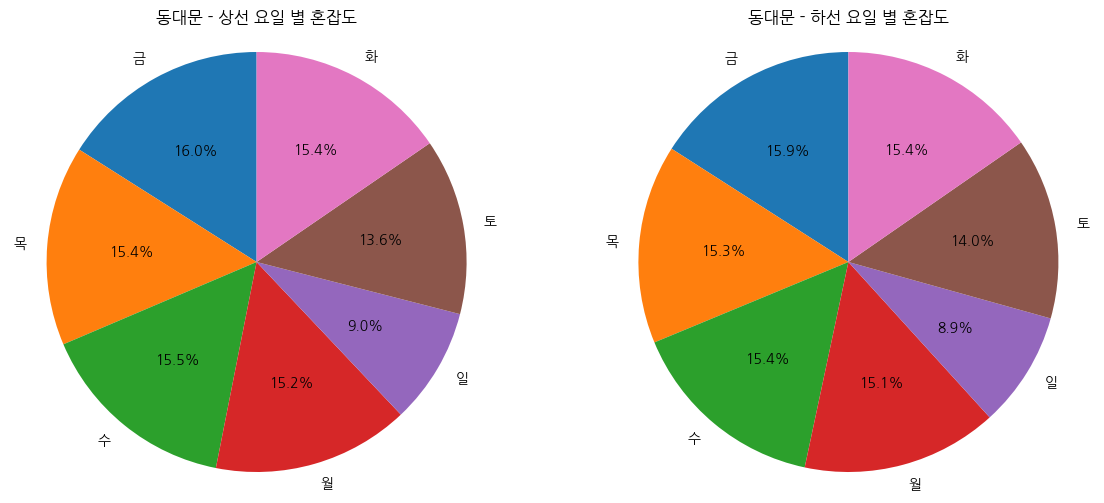

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def create_congestion_pie_chart(line_number, selected_station):
    # 파일 경로 생성
    file_path = f'/content/drive/MyDrive/세미 프로젝트/data/은채님{line_number}호선.csv'

    try:
        # 데이터 불러오기
        data = pd.read_csv(file_path)

        # 2022년 데이터 필터링
        data_2022 = data[data['YEAR'] == 2022]

        # 선택한 역에 대한 데이터 필터링
        data_selected_station = data_2022[data_2022['STATION'] == selected_station]

        if data_selected_station.empty:
            print(f"선택한 역 ({selected_station})에 대한 데이터가 없습니다.")
            return

        # 시간대 열을 숫자(float)로 변환
        time_columns = ['TIME_05', 'TIME_06', 'TIME_07', 'TIME_08', 'TIME_09',
                        'TIME_10', 'TIME_11', 'TIME_12', 'TIME_13', 'TIME_14',
                        'TIME_15', 'TIME_16', 'TIME_17', 'TIME_18', 'TIME_19',
                        'TIME_20', 'TIME_21', 'TIME_22', 'TIME_23', 'TIME_00']

        data_selected_station[time_columns] = data_selected_station[time_columns].astype(float)

        # 요일별 혼잡도 계산
        avg_congestion_by_day = data_selected_station.groupby(['DAY', 'DIRECTION'])[time_columns].mean().reset_index()

        # 파이 차트 생성 (상선)
        plt.figure(figsize=(14, 6))
        plt.subplot(121)  # 1x2 그리드 중 첫 번째 영역 (상선)
        labels_up = avg_congestion_by_day[avg_congestion_by_day['DIRECTION'] == '상선']['DAY'].astype(str)
        sizes_up = avg_congestion_by_day[avg_congestion_by_day['DIRECTION'] == '상선'][time_columns].mean(axis=1)
        plt.pie(sizes_up, labels=labels_up, autopct='%1.1f%%', startangle=90)
        plt.title(f'{selected_station} - 상선 요일 별 혼잡도')
        plt.axis('equal')  # 원의 형태 유지

        # 파이 차트 생성 (하선)
        plt.subplot(122)  # 1x2 그리드 중 두 번째 영역 (하선)
        labels_down = avg_congestion_by_day[avg_congestion_by_day['DIRECTION'] == '하선']['DAY'].astype(str)
        sizes_down = avg_congestion_by_day[avg_congestion_by_day['DIRECTION'] == '하선'][time_columns].mean(axis=1)
        plt.pie(sizes_down, labels=labels_down, autopct='%1.1f%%', startangle=90)
        plt.title(f'{selected_station} - 하선 요일 별 혼잡도')
        plt.axis('equal')  # 원의 형태 유지

        # 차트 표시
        plt.show()

    except FileNotFoundError:
        print(f"데이터 파일을 찾을 수 없습니다. 파일 경로를 확인하세요.")
    except Exception as e:
        print(f"오류 발생: {e}")

# 호선 번호와 선택한 역 이름을 지정하여 함수 호출 (원하는 호선 번호와 역 이름을 설정하세요)
line_number = 1  # 원하는 호선 번호로 설정
selected_station = '동대문'  # 원하는 역 이름으로 설정
create_congestion_pie_chart(line_number, selected_station)


## 특정 역 선택시 시간대별 혼잡도(선 그래프)



<ipython-input-33-de390b53591a>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected_station[time_columns] = data_selected_station[time_columns].astype(float)


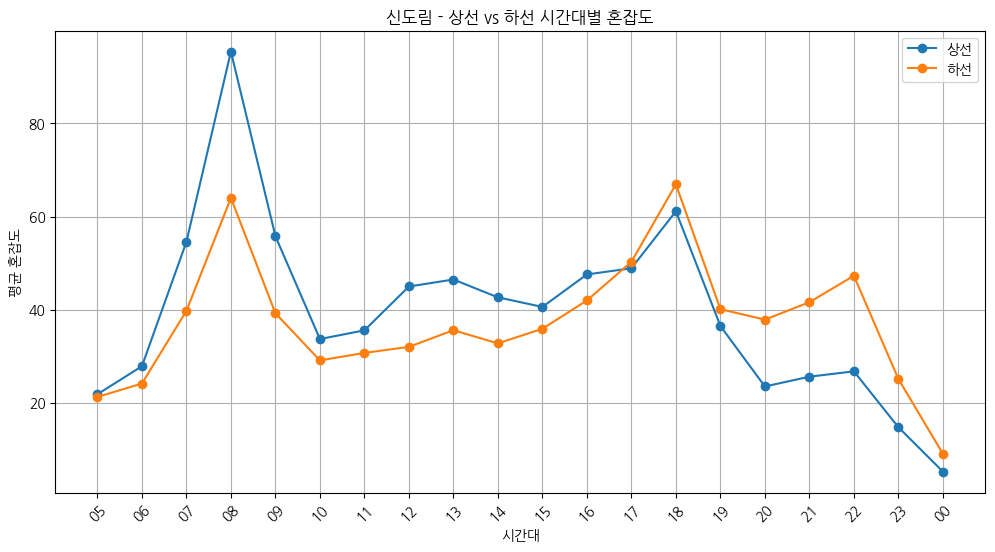

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def create_congestion_line_chart(line_number, selected_station):
    # 파일 경로 생성
    file_path = f'/content/drive/MyDrive/세미 프로젝트/data/은채님{line_number}호선.csv'

    try:
        # 데이터 불러오기
        data = pd.read_csv(file_path)

        # 2022년 데이터 필터링
        data_2022 = data[data['YEAR'] == 2022]

        # 선택한 역에 대한 데이터 필터링
        data_selected_station = data_2022[data_2022['STATION'] == selected_station]

        if data_selected_station.empty:
            print(f"선택한 역 ({selected_station})에 대한 데이터가 없습니다.")
            return

        # 시간대 열을 숫자(float)로 변환
        time_columns = ['TIME_05', 'TIME_06', 'TIME_07', 'TIME_08', 'TIME_09',
                        'TIME_10', 'TIME_11', 'TIME_12', 'TIME_13', 'TIME_14',
                        'TIME_15', 'TIME_16', 'TIME_17', 'TIME_18', 'TIME_19',
                        'TIME_20', 'TIME_21', 'TIME_22', 'TIME_23', 'TIME_00']

        data_selected_station[time_columns] = data_selected_station[time_columns].astype(float)

        # 상선 데이터 추출
        avg_congestion_up = data_selected_station[data_selected_station['DIRECTION'] == '상선'][time_columns].mean()

        # 하선 데이터 추출
        avg_congestion_down = data_selected_station[data_selected_station['DIRECTION'] == '하선'][time_columns].mean()

        # 시간대 라벨 생성
        time_labels = [col.split('_')[1] for col in time_columns]

        # 선 그래프 생성
        plt.figure(figsize=(12, 6))
        plt.plot(time_labels, avg_congestion_up, marker='o', linestyle='-', label='상선')
        plt.plot(time_labels, avg_congestion_down, marker='o', linestyle='-', label='하선')
        plt.title(f'{selected_station} - 상선 vs 하선 시간대별 혼잡도')
        plt.xlabel('시간대')
        plt.ylabel('평균 혼잡도')
        plt.xticks(rotation=45)  # x 축 라벨 회전
        plt.grid(True)
        plt.legend()  # 범례 표시

        # 그래프 표시
        plt.show()

    except FileNotFoundError:
        print(f"데이터 파일을 찾을 수 없습니다. 파일 경로를 확인하세요.")
    except Exception as e:
        print(f"오류 발생: {e}")

# 호선 번호와 선택한 역 이름을 지정하여 함수 호출 (원하는 호선 번호와 역 이름을 설정하세요)
line_number = 2  # 원하는 호선 번호로 설정
selected_station = '신도림'  # 원하는 역 이름으로 설정
create_congestion_line_chart(line_number, selected_station)
